In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("credit_train.csv")
df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       36423 non-null  object 
 1   Customer ID                   36423 non-null  object 
 2   Loan Status                   36423 non-null  object 
 3   Current Loan Amount           36423 non-null  float64
 4   Term                          36423 non-null  object 
 5   Credit Score                  36423 non-null  float64
 6   Annual Income                 36423 non-null  float64
 7   Years in current job          36423 non-null  object 
 8   Home Ownership                36423 non-null  object 
 9   Purpose                       36423 non-null  object 
 10  Monthly Debt                  36423 non-null  float64
 11  Years of Credit History       36423 non-null  float64
 12  Months since last delinquent  36423 non-null  float64
 13  N

# Data Balance

<AxesSubplot:xlabel='Loan Status'>

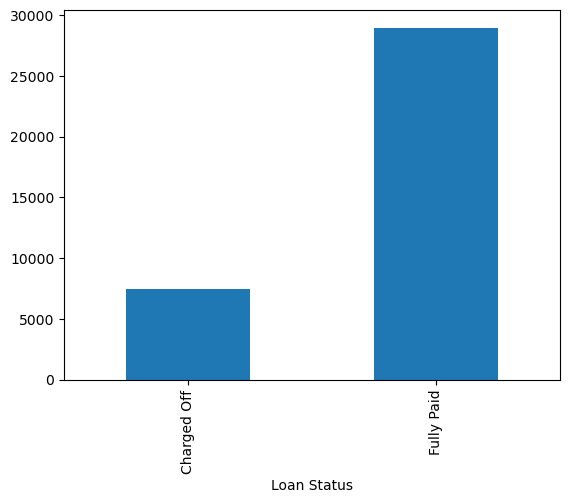

In [5]:
df.groupby('Loan Status')['Loan Status'].count().plot.bar()

<AxesSubplot:xlabel='Term'>

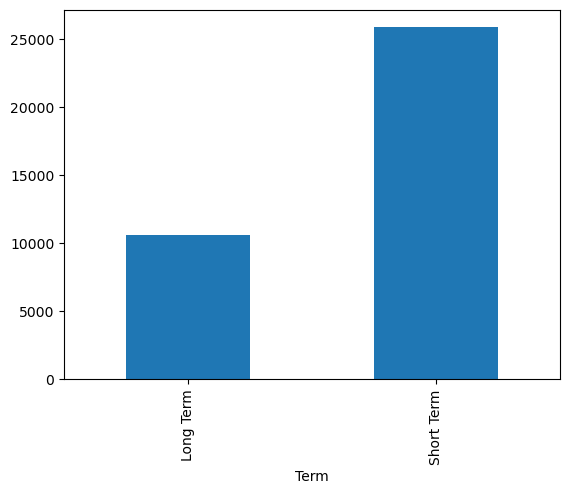

In [6]:
df.groupby('Term')['Loan Status'].count().plot.bar()

In [7]:
df.groupby(["Home Ownership","Loan Status"])["Loan Status"].count()

Home Ownership  Loan Status
HaveMortgage    Charged Off       11
                Fully Paid        76
Home Mortgage   Charged Off     3475
                Fully Paid     15356
Own Home        Charged Off      698
                Fully Paid      2507
Rent            Charged Off     3267
                Fully Paid     11033
Name: Loan Status, dtype: int64

# data cleaning

In [8]:
import re
def clean_year(str_):
    str_=str_.lower()
    str_=re.sub("[^A-Za-z0-9]+", " ", str_)
    str_=str_.strip()

    return int(str_.split(" ")[0])

In [9]:
df['Years_in_current_job']=df['Years in current job'].apply(clean_year)
df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Years_in_current_job
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,8
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,1
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,2
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0,3
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0,1


In [10]:
df.groupby(['Years_in_current_job','Loan Status'])['Loan Status'].count()

Years_in_current_job  Loan Status
1                     Charged Off     1127
                      Fully Paid      3819
2                     Charged Off      688
                      Fully Paid      2537
3                     Charged Off      578
                      Fully Paid      2419
4                     Charged Off      438
                      Fully Paid      1848
5                     Charged Off      517
                      Fully Paid      1970
6                     Charged Off      447
                      Fully Paid      1662
7                     Charged Off      446
                      Fully Paid      1636
8                     Charged Off      356
                      Fully Paid      1319
9                     Charged Off      310
                      Fully Paid      1157
10                    Charged Off     2544
                      Fully Paid     10605
Name: Loan Status, dtype: int64

<AxesSubplot:xlabel='Years_in_current_job,Loan Status'>

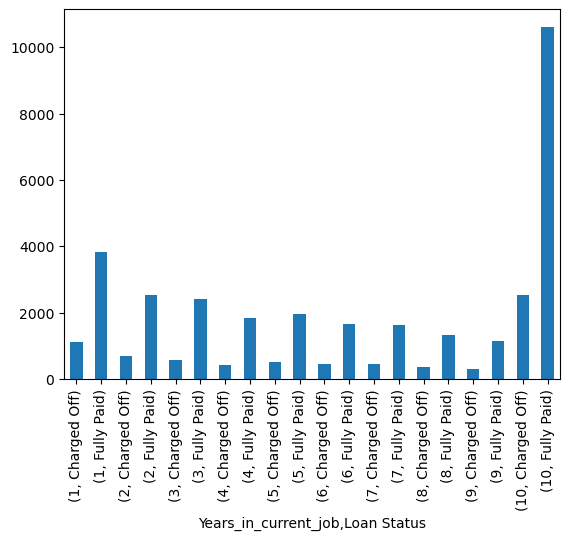

In [11]:
df.groupby(['Years_in_current_job','Loan Status'])['Loan Status'].count().plot.bar()

# Convert file 

In [12]:
df['Term_enc']=df['Term'].astype('category').cat.codes

In [13]:
df['Home_Ownership_enc']=df['Home Ownership'].astype('category').cat.codes

In [14]:
df['Purpose_enc']=df['Purpose'].astype('category').cat.codes
df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Years_in_current_job,Term_enc,Home_Ownership_enc,Purpose_enc
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,...,18.0,1.0,297996.0,750090.0,0.0,0.0,8,1,2,3
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,...,13.0,1.0,122170.0,272052.0,1.0,0.0,1,1,1,3
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,...,4.0,0.0,437171.0,555038.0,0.0,0.0,2,1,3,3
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,...,16.0,0.0,203965.0,289784.0,0.0,0.0,3,1,3,3
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,...,6.0,0.0,134083.0,220220.0,0.0,0.0,1,1,2,3


In [15]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Years_in_current_job', 'Term_enc', 'Home_Ownership_enc',
       'Purpose_enc'],
      dtype='object')

In [16]:
cat_columns=['Term_enc','Home_Ownership_enc','Purpose_enc', 'Number of Credit Problems','Bankruptcies','Tax Liens','Number of Open Accounts']
num_columns=['Current Loan Amount', 'Credit Score','Annual Income','Years_in_current_job', 'Years of Credit History','Months since last delinquent','Current Credit Balance','Maximum Open Credit']

# FEature Engineering
Anova test=Input is numerical and output is categorical
Chi-Square Input is categorical and output is categorical

In [17]:
from sklearn.feature_selection import f_classif, SelectKBest

In [18]:
X=df[num_columns].to_numpy()
Y=df['Loan Status'].to_numpy()

In [19]:
fs = SelectKBest(k=5, score_func = f_classif)
X_selected = fs.fit_transform(X,Y)

In [20]:
fs.get_support(True)

array([0, 1, 2, 3, 4], dtype=int64)

##Chi_square

In [21]:
X = df[cat_columns].to_numpy()
Y=df['Loan Status'].to_numpy()

In [22]:
from sklearn.feature_selection import chi2

In [23]:
fs = SelectKBest(k=5,score_func=chi2)
X_selected = fs.fit_transform(X,Y)
fs.get_support(True)

array([0, 1, 2, 5, 6], dtype=int64)

In [24]:
cat_column_selected=['Term_enc','Home_Ownership_enc','Purpose_enc','Tax Liens','Number of Open Accounts']
num_columns_selected=['Current Loan Amount', 'Credit Score','Annual Income','Years_in_current_job', 'Years of Credit History']

In [25]:
total_feature=cat_column_selected +num_columns_selected

In [26]:
X=df[total_feature].to_numpy()
Y=df['Loan Status'].to_numpy()

# Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scale=StandardScaler()

In [29]:
X_scaled=scale.fit_transform(X)

# Spliting the data

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y, test_size=0.2,shuffle =True)

# Traning Decesion Tree Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_pred = clf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [35]:
print(f'Accuracy of the classifier is {accuracy_score(y_test,y_pred)*100}')

Accuracy of the classifier is 85.02402196293755


In [36]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 452, 1049],
       [  42, 5742]], dtype=int64)

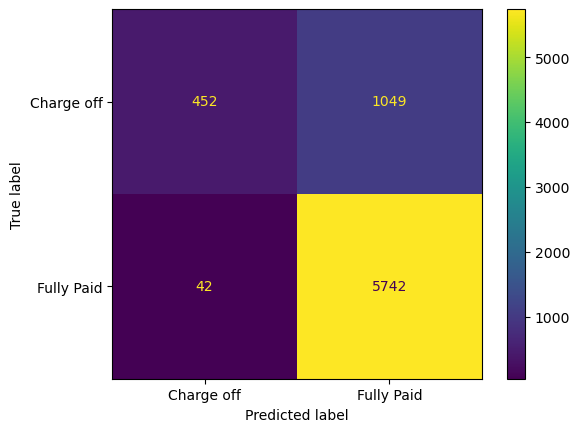

In [37]:
ConfusionMatrixDisplay(cm,display_labels=['Charge off','Fully Paid']).plot()

In [38]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

(array([0.91497976, 0.84553085]),
 array([0.30113258, 0.99273859]),
 array([0.45313283, 0.91324056]),
 array([1501, 5784], dtype=int64))

In [39]:
from sklearn.model_selection import GridSearchCV

In [42]:
rfc = RandomForestClassifier()

In [43]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [44]:
clf2 = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

In [45]:
clf2.fit(X_train,y_train)

C:\Users\alokd\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alokd\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alokd\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\alokd\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\alokd\anaconda3\lib\site-packages

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [47]:
print(clf2.best_params_)

{'max_depth': 13, 'max_features': 6}


In [52]:
print(clf2.best_score_)

0.8494406302563874


In [57]:
rfc=RandomForestClassifier(random_state=42)

In [58]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [59]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [61]:
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


In [66]:
print(CV_rfc.best_score_)

0.848891570363462


In [64]:
clf3 = RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features= 'auto', n_estimators= 200)
clf3.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=200)

In [67]:
y2_pred = clf3.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

84.99656829100893

In [68]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y2_pred)

(array([1.        , 0.84106442]),
 array([0.27181879, 1.        ]),
 array([0.42744893, 0.91367191]),
 array([1501, 5784], dtype=int64))